In [2]:
#######################
# Import dependencies #
#######################
import os
import pandas as pd
import numpy as np
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

##################################
# Load Arcadia-specific packages #
##################################
import sys
sys.path.append('../')
sys.path.append('../ProteinCartography')

import ProteinCartography as PC
import arcadia_pycolor as apc

apc.mpl_setup()

########################
# Set global variables #
########################
output_dir = 'pub_cluster_quality'

# create output directory if it doesn't already exist
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

/home/ec2-user/miniconda3/envs/cartography/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ec2-user/miniconda3/envs/cartography/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ec2-user/miniconda3/envs/cartography/lib/python3

In [3]:
results_folders = {
    'alktyrosinekinasereceptor': 'ALK',
    'bileacidreceptor': 'NR1H4',
    'cathepsink': 'CATK',
    'complementfactorh': 'CFAH',
    'dihydrofolatereductase': 'DYR',
    'e3ubiquitinproteinligasexiap1': 'XIAP',
    'glycogensynthasekinase3beta': 'GSK3B',
    'gtpasehras': 'RASH',
    'hemoglobinsubunitbeta': 'HBB',
    'hlaclassihistocompatibilityantigenaalphachain': 'HLAA',
    'immunoglobulinkappaconstant': 'IGKC',
    'macrophagemigrationinhibitoryfactor': 'MIF',
    'mitogenactivatedproteinkinase10': 'MK10',
    'nuclearreceptorcoactivator2': 'NCOA2',
    'parkinsondiseaseprotein7': 'PARK7',
    'peptidylprolylcistransisomerasea': 'PPIA',
    'peptidylprolylcistransisomerasefkbp5': 'FKBP5',
    'phosphatidylinositol3kinaseregulatorysubunitalpha': 'P85A',
    'polycombproteineed': 'EED',
    'proteasomesubunitbetatype5': 'PSB5',
    'retinoicacidreceptorrxralpha': 'RXRA',
    'retinolbindingprotein2': 'RET2',
    'superoxidedisumutase': 'SODC',
    'ubiquitincarboxylterminalhydrolase7': 'UBP7',
    'vonhippelailindaudiseasetumorsuppressor': 'VHL'
}

results_folders_r = dict(zip(results_folders.values(), results_folders.keys()))

protids_dict = {
    'ALK': 'Q9UM73',
    'NR1H4': 'Q96RI1',
    'CATK': 'P43235',
    'CFAH': 'P08603',
    'DYR': 'P00374',
    'XIAP': 'P98170',
    'GSK3B': 'P49841',
    'RASH': 'P01112',
    'HBB': 'P68871',
    'HLAA': 'P04439',
    'IGKC': 'P01834',
    'MIF': 'P14174',
    'MK10': 'P53779',
    'NCOA2': 'Q15596',
    'PARK7': 'Q99497',
    'PPIA': 'P62937',
    'FKBP5': 'Q13451',
    'P85A': 'P27986',
    'EED': 'O75530',
    'PSB5': 'P28074',
    'RXRA': 'P19793',
    'RET2': 'P50120',
    'SODC': 'P00441',
    'UBP7': 'Q93009',
    'VHL': 'P40337',
}

In [4]:
simm_files_prefix = [os.path.join('../', folder, 'output', 'clusteringresults', f'{folder.split("_")[0]}') for folder in results_folders]

leiden_diag_means = []
leiden_nclust = []
sc_diag_means = []
sc_nclust = []

skipped = []

for i, pre in enumerate(simm_files_prefix):

    if not os.path.exists(f'{pre}_leiden_similarity.tsv') or not os.path.exists(f'{pre}_strucluster_similarity.tsv'):
        skipped.append(list(results_folders.keys())[i])
        continue
    
    leiden_df = pd.read_csv(f'{pre}_leiden_similarity.tsv', sep = '\t', index_col = 'LeidenCluster')
    leiden_diag = np.diagonal(leiden_df)
    leiden_diag_mean = np.mean(leiden_diag)
    
    leiden_nclust.append(len(leiden_diag))
    leiden_diag_means.append(leiden_diag_mean)
    
    sc_df = pd.read_csv(f'{pre}_strucluster_similarity.tsv', sep = '\t', index_col = 'StruCluster')
    sc_diag = np.diagonal(sc_df)
    sc_diag_mean = np.mean(sc_diag)
    
    sc_nclust.append(len(sc_diag))
    sc_diag_means.append(sc_diag_mean)

not_skipped = [results_folders[i] for i in results_folders if i not in skipped]

means_df = pd.DataFrame({'Leiden': leiden_diag_means, 'Structural': sc_diag_means}, index = not_skipped)
nclust_df = pd.DataFrame({'Leiden': leiden_nclust, 'Structural': sc_nclust}, index = not_skipped)

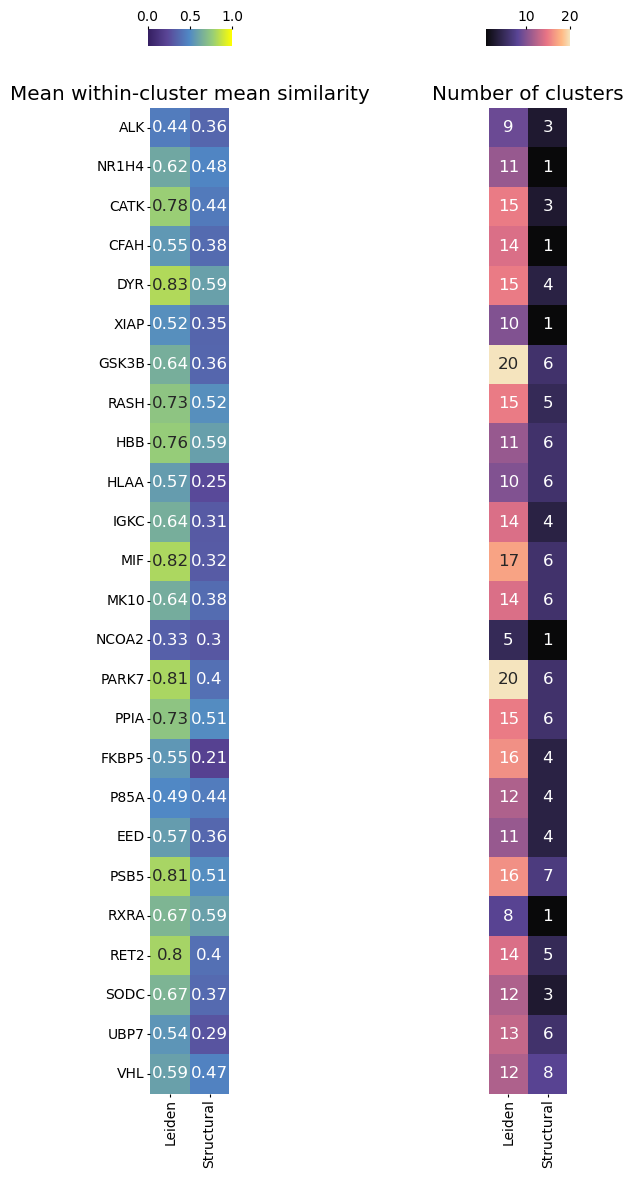

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (8, 16))
fig.subplots_adjust(wspace=0.2)

sns.heatmap(means_df, cmap = 'arcadia:viridis', ax = ax1, vmin = 0, vmax = 1, annot = True, square = True, cbar_kws = dict(use_gridspec=False,location="top", shrink = 0.3, aspect = 5))
ax1.title.set_text('Mean within-cluster mean similarity')

sns.heatmap(nclust_df, cmap = 'arcadia:magma', ax = ax2, annot = True, square = True, yticklabels = False, cbar_kws = dict(use_gridspec=False,location="top", shrink = 0.3, aspect = 5))
ax2.title.set_text('Number of clusters')

plt.savefig('cluster_diagonal_comparison_human_proteins.svg')

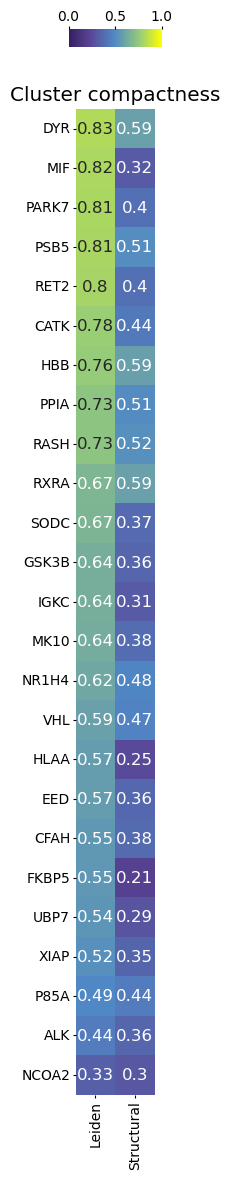

In [6]:
fig = plt.figure(figsize = (4, 16))

ax = sns.heatmap(means_df.sort_values('Leiden', ascending = False), cmap = 'arcadia:viridis', vmin = 0, vmax = 1, annot = True, square = True, cbar_kws = dict(use_gridspec=False,location="top", shrink = 0.3, aspect = 5))
ax.title.set_text('Cluster compactness')

plt.savefig('sorted_leiden_compactness.svg')

In [7]:
sampled_df = pd.read_csv('sampled_proteins.tsv', sep = '\t', index_col = 0)

metrics_df = means_df.join(nclust_df, lsuffix = '_mean', rsuffix = '_count')
heatmap_df = metrics_df.copy(deep = True)

protids_df = pd.DataFrame({'protid': protids_dict.values()}, index = protids_dict.keys())
metrics_df = metrics_df.join(protids_df)
metrics_df = metrics_df.reset_index().rename(columns = {'index': 'gene'})

metrics_df = metrics_df.merge(sampled_df, left_on = 'protid', right_on = 'protid')

most_studied_proteins_df = pd.read_csv('most_studied_human_proteins_analysis.tsv', sep = '\t', index_col = 0)

metrics_df = pd.concat([metrics_df, most_studied_proteins_df])
metrics_df.to_csv('most_studied_human_proteins_metadata.tsv', sep = '\t', index = None)

display(metrics_df)

gene  Leiden_mean  Structural_mean  Leiden_count  Structural_count  \
0      ALK     0.441706         0.355777           9.0               3.0   
1    NR1H4     0.615007         0.477803          11.0               1.0   
2     CATK     0.776074         0.437483          15.0               3.0   
3     CFAH     0.551208         0.378385          14.0               1.0   
4      DYR     0.826029         0.588685          15.0               4.0   
..     ...          ...              ...           ...               ...   
182    NaN          NaN              NaN           NaN               NaN   
183    NaN          NaN              NaN           NaN               NaN   
184    NaN          NaN              NaN           NaN               NaN   
185    NaN          NaN              NaN           NaN               NaN   
186    NaN          NaN              NaN           NaN               NaN   

     protid                                           protein  Length  \
0    Q9UM73                      ALK tyrosine kinase receptor    1620   
1    Q96RI1                                Bile acid receptor     486   
2    P43235                                       Cathepsin K     329   
3    P08603                               Complement factor H    1231   
4    P00374                           Dihydrofolate reductase     187   
..      ...                                               ...     ...   
182  P18031  Tyrosine-protein phosphatase non-receptor type 1     435   
183  P29373          Cellular retinoic acid-binding protein 2     138   
184  P0DP23                                      Calmodulin-1     149   
185  P25788                   Proteasome subunit alpha type-3     255   
186  P04746                          Pancreatic alpha-amylase     511   

    pdb_origin  pdb_confidence pdb_chains  Length_bin  pdb_confidence_bin  \
0    Alphafold       67.276466      ['A']          10                   1   
1    Alphafold       69.765294      ['A']           6                   2   
2    Alphafold       95.094008      ['A']           4                   9   
3    Alphafold       79.112146      ['A']          10                   3   
4    Alphafold       96.339755      ['A']           2                  10   
..         ...             ...        ...         ...                 ...   
182  Alphafold       82.030609      ['A']           6                   3   
183  Alphafold       96.710100      ['A']           1                  10   
184  Alphafold       85.087947      ['A']           2                   5   
185  Alphafold       94.693955      ['A']           3                   9   
186  Alphafold       96.663322      ['A']           7                  10   

    combined  combined_weight sampled  
0    (10, 1)         0.037433     yes  
1     (6, 2)         0.010695     yes  
2     (4, 9)         0.026738     yes  
3    (10, 3)         0.032086     yes  
4    (2, 10)         0.037433     yes  
..       ...              ...     ...  
182   (6, 3)         0.026738      no  
183  (1, 10)         0.026738      no  
184   (2, 5)         0.005348      no  
185   (3, 9)         0.021390      no  
186  (7, 10)         0.005348      no  

[212 rows x 16 columns]

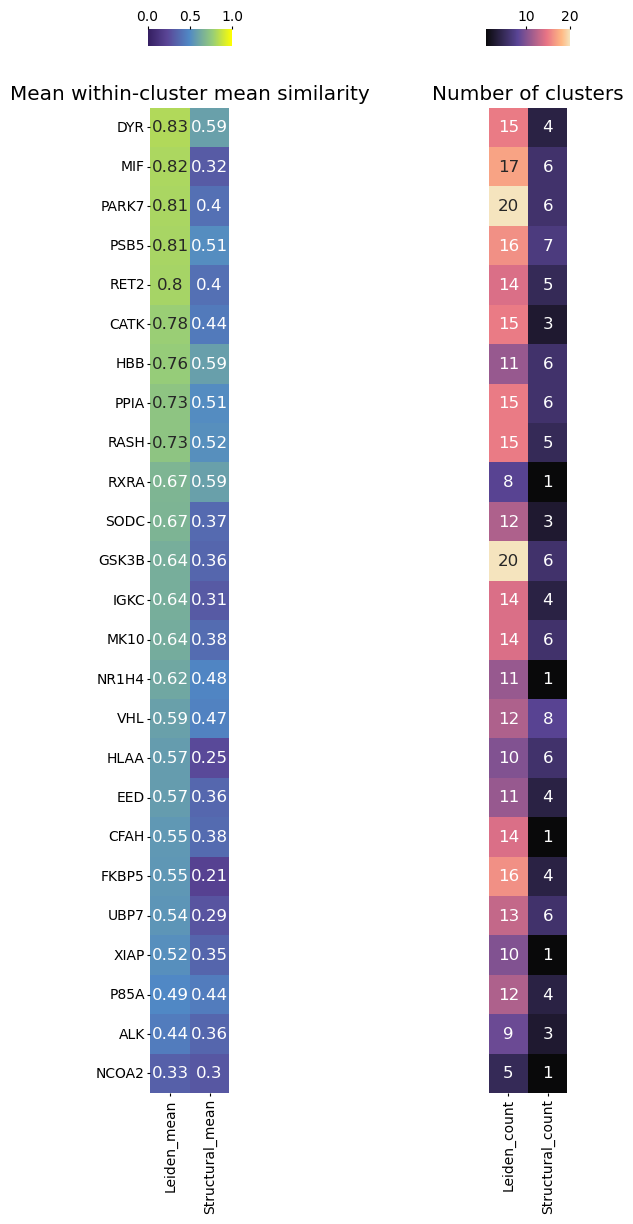

In [8]:
heatmap_df.sort_values('Leiden_mean', ascending = False, inplace = True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (8, 16))
fig.subplots_adjust(wspace=0.2)

sns.heatmap(heatmap_df[['Leiden_mean', 'Structural_mean']], cmap = 'arcadia:viridis', ax = ax1, vmin = 0, vmax = 1, annot = True, square = True, cbar_kws = dict(use_gridspec=False,location="top", shrink = 0.3, aspect = 5))
ax1.title.set_text('Mean within-cluster mean similarity')

sns.heatmap(heatmap_df[['Leiden_count', 'Structural_count']], cmap = 'arcadia:magma', ax = ax2, annot = True, square = True, yticklabels = False, cbar_kws = dict(use_gridspec=False,location="top", shrink = 0.3, aspect = 5))
ax2.title.set_text('Number of clusters')

plt.savefig('cluster_diagonal_comparison_human_proteins_sorted.svg')

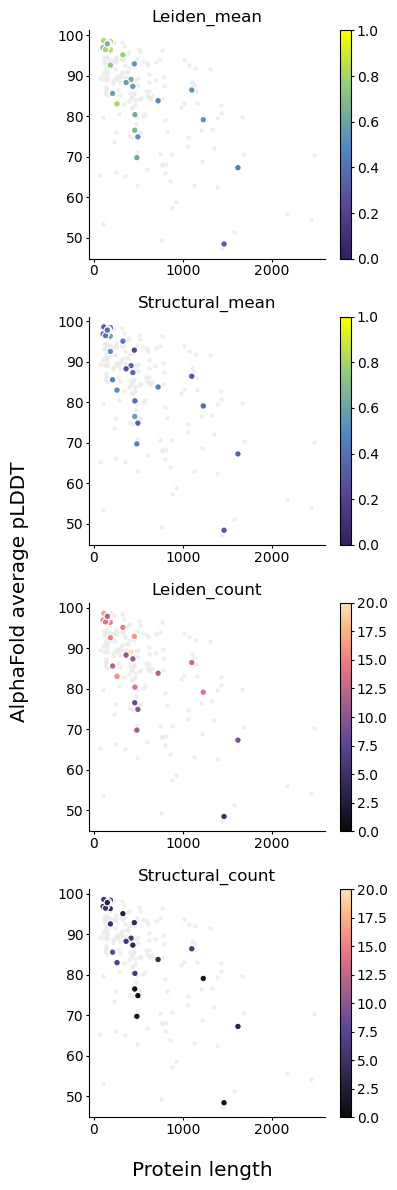

In [9]:
fig = plt.figure(figsize = (4, 12))

viridis = apc.Gradients['arcadia:viridis'].mpl_LinearSegmentedColormap
magma = apc.Gradients['arcadia:magma'].mpl_LinearSegmentedColormap

for i, column in enumerate(['Leiden_mean', 'Structural_mean', 'Leiden_count', 'Structural_count']):

    if 'mean' in column:
        v = [0, 1]
        cmap = viridis
    elif 'count' in column:
        v = [0, max(max(metrics_df['Leiden_count']), max(metrics_df['Structural_count']))]
        cmap = magma

    selected = metrics_df[~metrics_df[column].isna()]
    notselected = metrics_df[metrics_df[column].isna()]
    
    plt.subplot(4, 1, i + 1)
    plt.scatter(
        x = notselected['Length'], 
        y = notselected['pdb_confidence'], 
        s = 10, 
        alpha = 0.8, 
        color = 'arcadia:brightgrey',
    )
    sc = plt.scatter(
        x = selected['Length'], 
        y = selected['pdb_confidence'], 
        s = 22, 
        alpha = 1, 
        c = selected[column],
        edgecolors = 'white',
        linewidths = 0.8,
        vmin = v[0],
        vmax = v[1],
        cmap = cmap
    )
    plt.colorbar(sc)
    plt.title(column, fontsize = 12)
    
fig.supxlabel('Protein length')
fig.supylabel('AlphaFold average pLDDT')

plt.tight_layout()

plt.savefig('most_studied_human_proteins_cluster_quality.svg')
plt.show()

In [10]:
fig = make_subplots(rows=2, cols=2)

def subplot_indices(num_rows, num_cols):
    row_indices, col_indices = np.meshgrid(np.arange(1, num_rows + 1), np.arange(1, num_cols + 1))
    indices = list(zip(row_indices.ravel(), col_indices.ravel()))
    return indices


viridis_list = apc.Gradients['arcadia:viridis'].grad_nested_list
magma_list = apc.Gradients['arcadia:magma'].grad_nested_list

for i, column in zip(subplot_indices(2, 2), ['Leiden_mean', 'Structural_mean', 'Leiden_count', 'Structural_count']):

    if 'mean' in column:
        c = [0, 1]
        cmap = viridis_list
    elif 'count' in column:
        c = [0, max(max(metrics_df['Leiden_count']), max(metrics_df['Structural_count']))]
        cmap = magma_list
    
    fig.add_trace(
        go.Scatter(
            x = metrics_df['Length'], 
            y = metrics_df['pdb_confidence'],
            mode = 'markers',
            marker = dict(
                color = metrics_df[column].fillna(-0.01),
                colorscale = cmap,
                cmin = c[0],
                cmax = c[1],
                colorbar = dict(title = column)
            )
        ),
        row=i[0], col=i[1]
    )


fig.update_layout(height=800, width=800, title_text="Side By Side Subplots")
fig.show()

In [11]:
len_df = metrics_df[~metrics_df['gene'].isna()].sort_values('Leiden_mean')

lens = list(len_df['gene'].values)
len_files_prefix = [os.path.join('../', results_folders_r[gene], 'output', 'clusteringresults', f'{results_folders_r[gene].split("_")[0]}') for gene in lens]
blast_files_prefix = [os.path.join('../', results_folders_r[gene], 'output', 'blastresults') for gene in lens]

lengths_list = []
lengths_mean_list = []
lengths_median_list = []

pdb_confidence_list = []
pdb_confidence_mean_list = []
pdb_confidence_median_list = []

ndomains_prot_list = []
ndomains_list = []
ndomains_mean_list = []
ndomains_median_list = []

tmscore_list = []
tmscore_mean_list = []
tmscore_median_list = []

tmscore_fs_list = []
tmscore_fs_mean_list = []
tmscore_fs_median_list = []

tmscore_blast_list = []
tmscore_blast_mean_list = []
tmscore_blast_median_list = []

fident_fs_list = []
fident_fs_mean_list = []
fident_fs_median_list = []

fident_blast_list = []
fident_blast_mean_list = []
fident_blast_median_list = []

counts_list = []
fs_counts_list = []
blast_counts_list = []
nspecies_list = []
taxon_counts_dict = {}

for i, pre in enumerate(len_files_prefix):

    protid = protids_dict[lens[i]]

    agg_df = pd.read_csv(f'{pre}_aggregated_features.tsv', sep = '\t')
    agg_df = agg_df[~agg_df['StruCluster'].isna()]

    counts_list.append(len(agg_df))
    fs_counts_list.append(len(agg_df[agg_df['source.method'].str.contains('foldseek')]))
    blast_counts_list.append(len(agg_df[agg_df['source.method'].str.contains('blast')]))
    nspecies_list.append(len(agg_df['Organism'].unique()))
    
    lengths = agg_df['Length'].astype('int').values
    lengths_list.append(lengths)
    lengths_mean_list.append(np.mean(lengths))
    lengths_median_list.append(np.median(lengths))

    pdb_confidence = agg_df['pdb_confidence'].astype('int').values
    pdb_confidence_list.append(pdb_confidence)
    pdb_confidence_mean_list.append(np.mean(pdb_confidence))
    pdb_confidence_median_list.append(np.median(pdb_confidence))

    tmscores = agg_df[f'TMscore_v_{protid}'].values
    tmscore_list.append(tmscores)

    tmscore_mean_list.append(np.mean(tmscores))
    tmscore_median_list.append(np.median(tmscores))

    tmscore_fs = agg_df[agg_df['source.method'].str.contains('foldseek')][f'TMscore_v_{protid}'].values
    tmscore_fs_list.append(tmscore_fs)
    tmscore_fs_mean_list.append(np.mean(tmscore_fs))
    tmscore_fs_median_list.append(np.median(tmscore_fs))
    
    tmscore_blast = agg_df[agg_df['source.method'].str.contains('blast')][f'TMscore_v_{protid}'].values
    tmscore_blast_list.append(tmscore_blast)
    tmscore_blast_mean_list.append(np.mean(tmscore_blast))
    tmscore_blast_median_list.append(np.median(tmscore_blast))

    fidents_fs = agg_df[f'fident_v_{protid}'].dropna().values
    fident_fs_list.append(fidents_fs)
    fident_fs_mean_list.append(np.mean(fidents_fs))
    fident_fs_median_list.append(np.median(fidents_fs))

    blast_results_df = pd.read_csv(f'{blast_files_prefix[i]}/{protid}.blastresults.tsv', sep = '\t', header = None)
    fidents_blast = blast_results_df[2].values * 0.01
    fident_blast_list.append(fidents_blast)
    fident_blast_mean_list.append(np.mean(fidents_blast))
    fident_blast_median_list.append(np.median(fidents_blast))

    agg_df = pd.read_csv(f'{pre}_aggregated_features.tsv', sep = '\t')
    agg_df = agg_df[~agg_df['StruCluster'].isna()]

    agg_df['Pfam_ndomains'] = agg_df['Pfam'].apply(lambda x: len([i for i in x.split(';') if i != '']) if x is not np.nan else 0)
    ndomains_prot_list.append(list(agg_df[agg_df['protid'] == protids_dict[lens[i]]]['Pfam_ndomains'].values)[0])
    ndomains = agg_df['Pfam_ndomains'].values
    ndomains_list.append(ndomains)
    ndomains_mean_list.append(np.mean(ndomains))
    ndomains_median_list.append(np.median(ndomains))

    agg_df['Broad Taxon'] = agg_df['Lineage'].apply(lambda x: PC.assign_taxon(x, PC.EUK_COLOR_DICT.keys(), hierarchical = True))

    taxon_counts_dict[lens[i]] = agg_df['Broad Taxon'].value_counts()

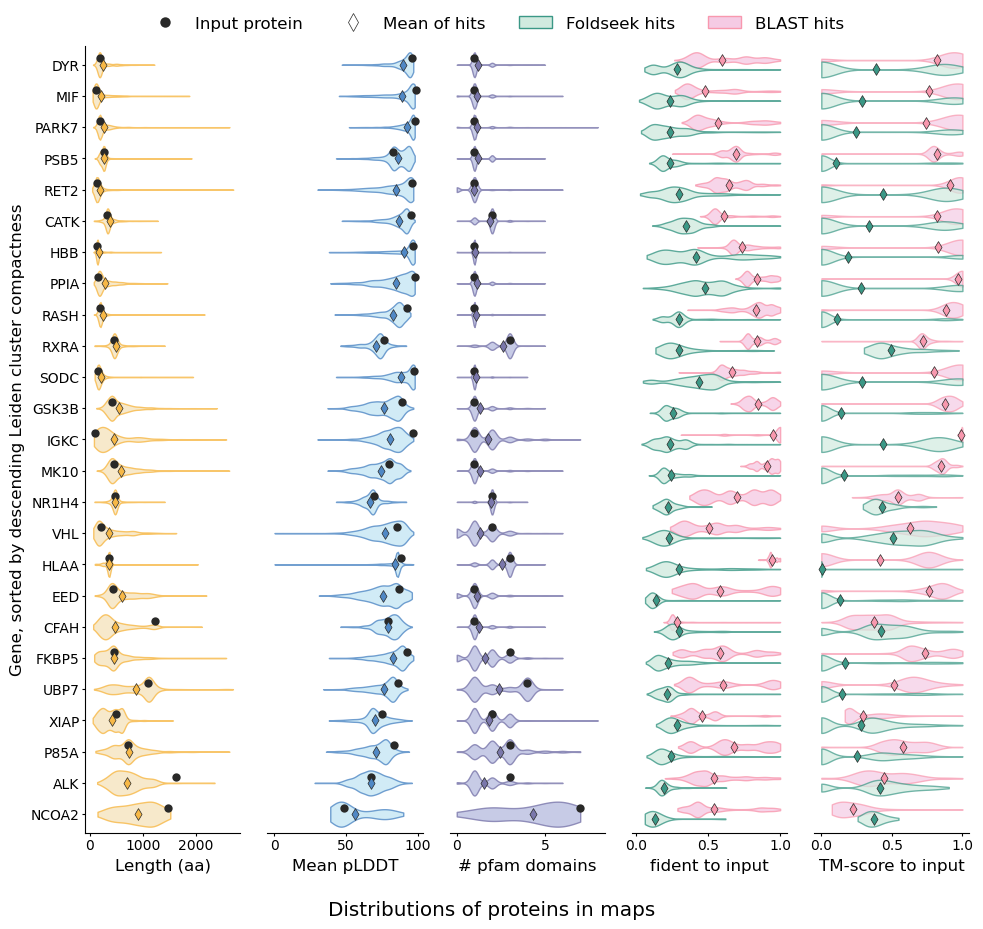

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 9))
fig.subplots_adjust(wspace = 0.1)
parts = ax1.violinplot(lengths_list, vert = False, showextrema = False, widths = 0.8)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:oat'])
    pc.set_edgecolor(apc.All['arcadia:canary'])
    pc.set_linewidths(1)
    pc.set_alpha(0.8)

ax1.scatter(x = len_df['Length'].values, y = [i + 1.2 for i in range(len(len_df))], color = 'arcadia:crow')
ax1.scatter(x = lengths_mean_list, y = [i + 1 for i in range(len(len_df))], color = 'arcadia:canary', edgecolor = 'arcadia:crow' , linewidth = 0.5, marker = "d")

ax1.set_yticks([i + 1 for i in range(len(len_df))])
ax1.set_yticklabels(lens)
ax1.set_ylim(0.4, 25.6)
ax1.set_xlabel('Length (aa)')
ax1.set_ylabel('Gene, sorted by descending Leiden cluster compactness')

parts = ax2.violinplot(pdb_confidence_list, vert = False, showextrema = False, widths = 0.8)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:bluesky'])
    pc.set_edgecolor(apc.All['arcadia:aegean'])
    pc.set_linewidths(1)
    pc.set_alpha(0.8)

ax2.scatter(x = len_df['pdb_confidence'].values, y = [i + 1.2 for i in range(len(len_df))], color = 'arcadia:crow')
ax2.scatter(x = pdb_confidence_mean_list, y = [i + 1 for i in range(len(len_df))], color = 'arcadia:aegean', edgecolor = 'arcadia:crow' , linewidth = 0.5, marker = "d")
ax2.set_yticks([])
ax2.spines[['left']].set_visible(False)
ax2.set_ylim(0.4, 25.6)
ax2.set_xlabel('Mean pLDDT')

parts = ax3.violinplot(ndomains_list, vert = False, showextrema = False, widths = 0.8)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:wish'])
    pc.set_edgecolor(apc.All['arcadia:aster'])
    pc.set_linewidths(1)
    pc.set_alpha(0.8)

ax3.scatter(x = ndomains_prot_list, y = [i + 1.2 for i in range(len(len_df))], color = 'arcadia:crow')
ax3.scatter(x = ndomains_mean_list, y = [i + 1 for i in range(len(len_df))], color = 'arcadia:aster', edgecolor = 'arcadia:crow' , linewidth = 0.5, marker = "d")

ax3.set_yticks([])
ax3.spines[['left']].set_visible(False)
ax3.set_ylim(0.4, 25.6)
ax3.set_xlabel('# pfam domains')

######

parts = ax4.violinplot(fident_blast_list, positions = [i + 1.15 for i in range(len(len_df))], vert = False, showextrema = False, widths = 0.5)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:blossom'])
    pc.set_edgecolor(apc.All['arcadia:rose'])
    pc.set_linewidths(1)
    pc.set_alpha(0.8)

parts = ax4.violinplot(fident_fs_list, positions = [i + 0.85 for i in range(len(len_df))], vert = False, showextrema = False, widths = 0.5)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:mint'])
    pc.set_edgecolor(apc.All['arcadia:seaweed'])
    pc.set_linewidths(1)
    pc.set_alpha(0.8)

ax4.scatter(x = fident_blast_mean_list, y = [i + 1.15 for i in range(len(len_df))], color = 'arcadia:rose', edgecolor = 'arcadia:crow', linewidth = 0.5, marker = "d")
ax4.scatter(x = fident_fs_mean_list, y = [i + 0.85 for i in range(len(len_df))], color = 'arcadia:seaweed', edgecolor = 'arcadia:crow', linewidth = 0.5, marker = "d")

ax4.set_yticks([])
ax4.spines[['left']].set_visible(False)
ax4.set_ylim(0.4, 25.6)
ax4.set_xlabel('fident to input')

######

parts = ax5.violinplot(tmscore_blast_list, positions = [i + 1.15 for i in range(len(len_df))], vert = False, showextrema = False, widths = 0.5)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:blossom'])
    pc.set_edgecolor(apc.All['arcadia:rose'])
    pc.set_linewidths(1)
    pc.set_alpha(0.7)
    
parts = ax5.violinplot(tmscore_fs_list,  positions = [i + 0.85 for i in range(len(len_df))], vert = False, showextrema = False, widths = 0.5)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:mint'])
    pc.set_edgecolor(apc.All['arcadia:seaweed'])
    pc.set_linewidths(1)
    pc.set_alpha(0.7)

ax5.scatter(x = tmscore_blast_mean_list, y = [i + 1.15 for i in range(len(len_df))], color = 'arcadia:rose', edgecolor = 'arcadia:crow', linewidth = 0.5, marker = "d")
ax5.scatter(x = tmscore_fs_mean_list, y = [i + 0.85 for i in range(len(len_df))], color = 'arcadia:seaweed', edgecolor = 'arcadia:crow', linewidth = 0.5, marker = "d")
                     
ax5.set_yticks([])
ax5.spines[['left']].set_visible(False)
ax5.set_ylim(0.4, 25.6)
ax5.set_xlabel('TM-score to input')

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='.', markerfacecolor='arcadia:crow', markersize=15, linewidth = 0, label='Input protein'),
                   Line2D([0], [0], marker='d', markeredgecolor='arcadia:crow', markersize=9, markeredgewidth = 0.5, markerfacecolor = 'w', linewidth = 0, label='Mean of hits'),
                   Patch(facecolor = 'arcadia:mint', edgecolor='arcadia:seaweed', linewidth = 1, label='Foldseek hits'),
                   Patch(facecolor = 'arcadia:blossom', edgecolor='arcadia:rose', linewidth = 1, label='BLAST hits')]

fig.supxlabel('Distributions of proteins in maps')
plt.tight_layout()

ax3.legend(legend_elements, ['Input protein', 'Mean of hits', 'Foldseek hits', 'BLAST hits'], loc = 'lower center', bbox_to_anchor = (0.3, 1), ncols = len(legend_elements))

plt.savefig('most_studied_proteins_hit_distributions.svg')
plt.show()

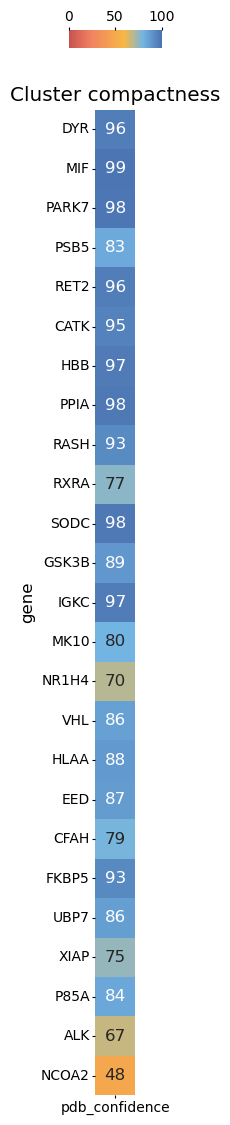

In [57]:
plddt_gradient_dict = {
    'color_dict': apc.dragon | apc.amber | apc.canary | apc.vitalblue | {'arcadia:cobalt': '#4A72B0'},
    'values': [0, 0.25, 0.6, 0.8, 1]
}

# instantiate a new Gradient object
plddt_gradient = apc.Gradient(
    name = 'plddt_gradient',
    color_dict = plddt_gradient_dict['color_dict'], 
    values = plddt_gradient_dict['values']
)

plddt_gradient.mpl_LinearSegmentedColormap_register()

conf_df = metrics_df[~metrics_df['gene'].isna()].sort_values('Leiden_mean', ascending = False)[['pdb_confidence', 'gene']]
conf_df.index = conf_df['gene']
conf_df.drop(columns = ['gene'], inplace = True)

fig = plt.figure(figsize = (4, 16))

ax = sns.heatmap(conf_df, cmap = 'plddt_gradient', vmin = 0, vmax = 100, annot = True, square = True, cbar_kws = dict(use_gridspec=False,location="top", shrink = 0.3, aspect = 5))
ax.title.set_text('Cluster compactness')

plt.savefig('sorted_pdb_confidence.svg')

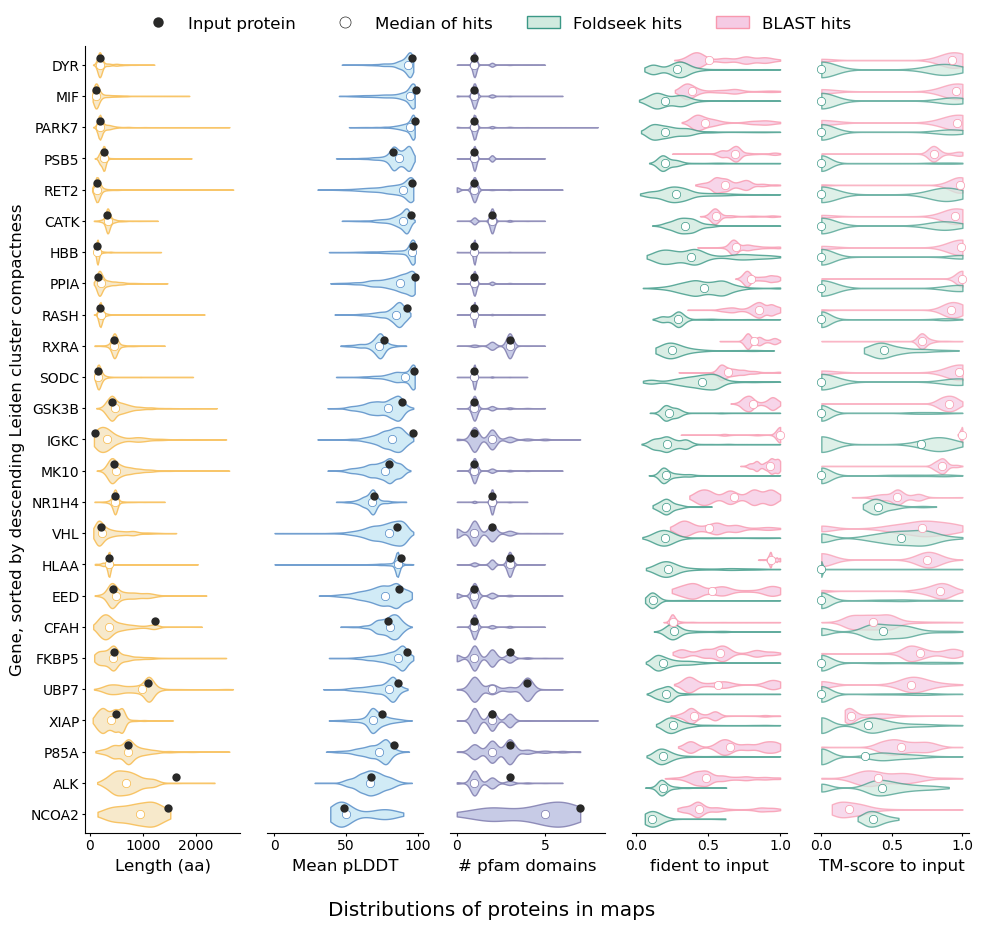

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 9))
fig.subplots_adjust(wspace = 0.1)

line_length = 0.35
median_point = 1
ypos = [i + median_point for i in range(len(len_df))]
ymins = [i + median_point - line_length for i in range(len(len_df))]
ymaxs = [i + median_point + line_length for i in range(len(len_df))]

parts = ax1.violinplot(lengths_list, vert = False, showextrema = False, widths = 0.8)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:oat'])
    pc.set_edgecolor(apc.All['arcadia:canary'])
    pc.set_linewidths(1)
    pc.set_alpha(0.8)

ax1.scatter(x = len_df['Length'].values, y = [i + 1.2 for i in range(len(len_df))], color = 'arcadia:crow', zorder = 10)
#ax1.scatter(x = lengths_mean_list, y = [i + 1 for i in range(len(len_df))], color = 'arcadia:crow', linewidth = 1, marker = 'x', zorder = 9)

#ax1.vlines(x = lengths_median_list, ymin = ymins, ymax = ymaxs, color = 'arcadia:canary')
ax1.scatter(x = lengths_median_list, y = ypos, color = 'w', edgecolor = 'arcadia:canary', linewidth = 0.5, marker = "o")

ax1.set_yticks([i + 1 for i in range(len(len_df))])
ax1.set_yticklabels(lens)
ax1.set_ylim(0.4, 25.6)
ax1.set_xlabel('Length (aa)')
ax1.set_ylabel('Gene, sorted by descending Leiden cluster compactness')

parts = ax2.violinplot(pdb_confidence_list, vert = False, showextrema = False, widths = 0.8)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:bluesky'])
    pc.set_edgecolor(apc.All['arcadia:aegean'])
    pc.set_linewidths(1)
    pc.set_alpha(0.8)

ax2.scatter(x = len_df['pdb_confidence'].values, y = [i + 1.2 for i in range(len(len_df))], color = 'arcadia:crow', zorder = 10)

#ax2.vlines(x = pdb_confidence_median_list, ymin = ymins, ymax = ymaxs, color = 'arcadia:aegean')
ax2.scatter(x = pdb_confidence_median_list, y = ypos, color = 'w', edgecolor = 'arcadia:aegean', linewidth = 0.5, marker = "o")

ax2.set_yticks([])
ax2.spines[['left']].set_visible(False)
ax2.set_ylim(0.4, 25.6)
ax2.set_xlabel('Mean pLDDT')

parts = ax3.violinplot(ndomains_list, vert = False, showextrema = False, widths = 0.8)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:wish'])
    pc.set_edgecolor(apc.All['arcadia:aster'])
    pc.set_linewidths(1)
    pc.set_alpha(0.8)

ax3.scatter(x = ndomains_prot_list, y = [i + 1.2 for i in range(len(len_df))], color = 'arcadia:crow', zorder = 10)

#ax3.vlines(x = ndomains_median_list, ymin = ymins, ymax = ymaxs, color = 'arcadia:aster')
ax3.scatter(x = ndomains_median_list, y = ypos, color = 'w', edgecolor = 'arcadia:aster', linewidth = 0.5, marker = "o")

ax3.set_yticks([])
ax3.spines[['left']].set_visible(False)
ax3.set_ylim(0.4, 25.6)
ax3.set_xlabel('# pfam domains')

######

median_point1 = 1.15
median_point2 = 0.85

ypos1 = [i + median_point1 for i in range(len(len_df))]
ypos2 = [i + median_point2 for i in range(len(len_df))]

ymins1 = [i + median_point1 - line_length for i in range(len(len_df))]
ymaxs1 = [i + median_point1 + line_length for i in range(len(len_df))]

ymins2 = [i + median_point2 - line_length for i in range(len(len_df))]
ymaxs2 = [i + median_point2 + line_length for i in range(len(len_df))]

parts = ax4.violinplot(fident_blast_list, positions = ypos1, vert = False, showextrema = False, widths = 0.5)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:blossom'])
    pc.set_edgecolor(apc.All['arcadia:rose'])
    pc.set_linewidths(1)
    pc.set_alpha(0.8)

parts = ax4.violinplot(fident_fs_list, positions = ypos2, vert = False, showextrema = False, widths = 0.5)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:mint'])
    pc.set_edgecolor(apc.All['arcadia:seaweed'])
    pc.set_linewidths(1)
    pc.set_alpha(0.8)

#ax4.vlines(x = fident_blast_median_list, ymin = ymins1, ymax = ymaxs1, color = 'arcadia:rose')
#ax4.vlines(x = fident_fs_median_list, ymin = ymins2, ymax = ymaxs2, color = 'arcadia:seaweed')

ax4.scatter(x = fident_blast_median_list, y = ypos1, color = 'w', edgecolor = 'arcadia:rose', linewidth = 0.5, marker = "o")
ax4.scatter(x = fident_fs_median_list, y = ypos2, color = 'w', edgecolor = 'arcadia:seaweed', linewidth = 0.5, marker = "o")

ax4.set_yticks([])
ax4.spines[['left']].set_visible(False)
ax4.set_ylim(0.4, 25.6)
ax4.set_xlabel('fident to input')

######

parts = ax5.violinplot(tmscore_blast_list, positions = ypos1, vert = False, showextrema = False, widths = 0.5)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:blossom'])
    pc.set_edgecolor(apc.All['arcadia:rose'])
    pc.set_linewidths(1)
    pc.set_alpha(0.7)
    
parts = ax5.violinplot(tmscore_fs_list,  positions = ypos2, vert = False, showextrema = False, widths = 0.5)

for pc in parts['bodies']:
    pc.set_facecolor(apc.All['arcadia:mint'])
    pc.set_edgecolor(apc.All['arcadia:seaweed'])
    pc.set_linewidths(1)
    pc.set_alpha(0.7)

#ax5.vlines(x = tmscore_blast_median_list, ymin = ymins1, ymax = ymaxs1, color = 'arcadia:rose')
#ax5.vlines(x = tmscore_fs_median_list, ymin = ymins2, ymax = ymaxs2, color = 'arcadia:seaweed')

ax5.scatter(x = tmscore_blast_median_list, y = ypos1, color = 'w', edgecolor = 'arcadia:rose', linewidth = 0.5, marker = "o")
ax5.scatter(x = tmscore_fs_median_list, y = ypos2, color = 'w', edgecolor = 'arcadia:seaweed', linewidth = 0.5, marker = "o")

ax5.set_yticks([])
ax5.spines[['left']].set_visible(False)
ax5.set_ylim(0.4, 25.6)
ax5.set_xlabel('TM-score to input')

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='.', markerfacecolor='arcadia:crow', markersize=15, linewidth = 0, label='Input protein'),
                   Line2D([0], [0], marker='o', markerfacecolor='w', markeredgecolor = 'arcadia:crow', markersize=8, markeredgewidth = 0.5, linewidth = 0, label='Median of hits'),
                   Patch(facecolor = 'arcadia:mint', edgecolor='arcadia:seaweed', linewidth = 1, label='Foldseek hits'),
                   Patch(facecolor = 'arcadia:blossom', edgecolor='arcadia:rose', linewidth = 1, label='BLAST hits')]

fig.supxlabel('Distributions of proteins in maps')
plt.tight_layout()

ax3.legend(legend_elements, ['Input protein', 'Median of hits', 'Foldseek hits', 'BLAST hits'], loc = 'lower center', bbox_to_anchor = (0.3, 1), ncols = len(legend_elements))

plt.savefig('most_studied_proteins_hit_distributions_median.svg')
plt.show()

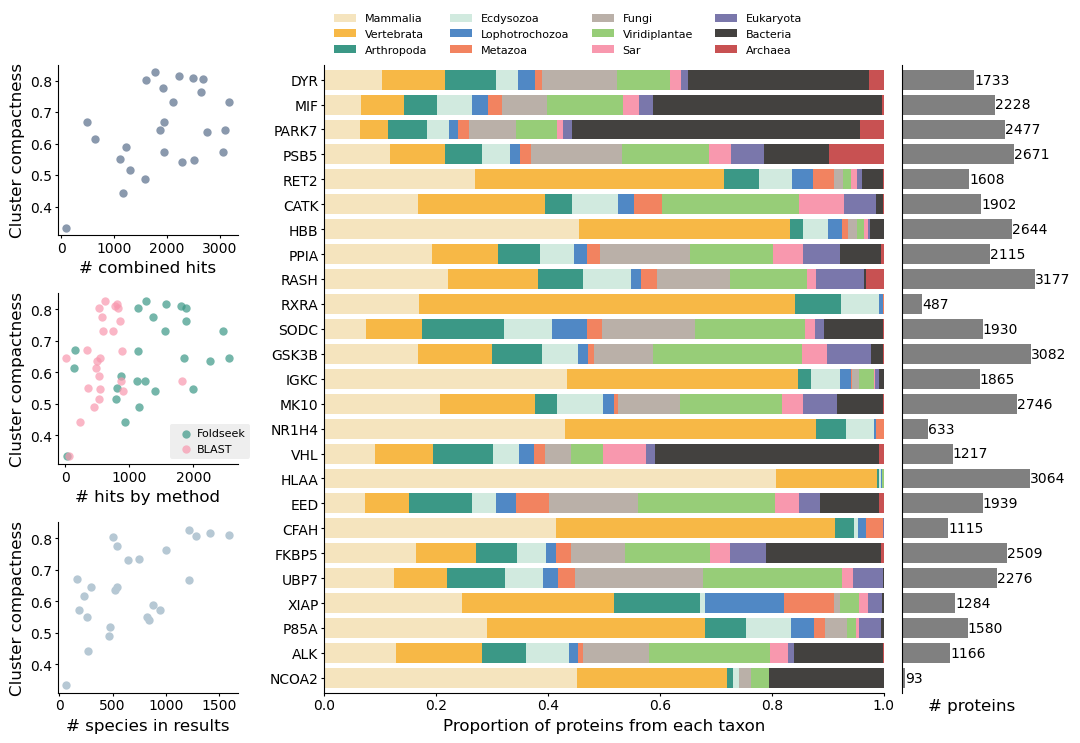

In [14]:
taxon_counts_df = pd.DataFrame(taxon_counts_dict).T.fillna(0)
taxon_counts_df = taxon_counts_df[[i for i in PC.EUK_COLOR_DICT.keys() if i in taxon_counts_df.columns]]
category_names = [i for i in PC.EUK_COLOR_DICT.keys() if i in taxon_counts_df.columns]
#display(taxon_counts_df)

def horizontal_stacked_bar_chart2(results, category_names, figsize=(10, 8), hide_labels=True):
    """
    Parameters
    ----------
    results : pandas DataFrame
        A DataFrame where index corresponds to question labels and columns correspond to categories.
    category_names : list of str
        The category labels.
    """
    labels = results.index
    data = results.values
    data_norm = data / data.sum(axis=1, keepdims=True)  # Normalize the data
    data_cum = data_norm.cumsum(axis=1)
    category_colors = [PC.EUK_COLOR_DICT[name] for name in category_names]

    fig = plt.figure(figsize = figsize)
    subfigs = fig.subfigures(1, 2, wspace=0.15, width_ratios=[1, 4])
    
    ax1_l, ax2_l, ax3_l = subfigs[0].subplots(nrows = 3, ncols = 1)
    
    ax1_l.scatter(x = counts_list, y = len_df['Leiden_mean'].values, color = 'arcadia:marineblue')
    ax1_l.set_xlabel('# combined hits')
    ax1_l.set_ylabel('Cluster compactness')

    ax2_l.scatter(x = fs_counts_list, y = len_df['Leiden_mean'].values, color = 'arcadia:seaweed', alpha = 0.7, label = 'Foldseek')
    ax2_l.scatter(x = blast_counts_list, y = len_df['Leiden_mean'].values, color = 'arcadia:rose', alpha = 0.7, label = 'BLAST')
    ax2_l.set_xlabel('# hits by method')
    ax2_l.set_ylabel('Cluster compactness')
    ax2_l.legend(loc = 'lower right', fontsize = 8, facecolor = 'arcadia:brightgrey', bbox_to_anchor = (1.1, 0), handletextpad = 0)
    
    ax3_l.scatter(x = nspecies_list, y = len_df['Leiden_mean'].values, color = 'arcadia:denim')
    ax3_l.set_xlabel('# species in results')
    ax3_l.set_ylabel('Cluster compactness')

    ax1, ax2 = subfigs[1].subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios': [4, 1]})  # Adjust the width ratio here
    subfigs[1].subplots_adjust(wspace = -0.05)
    ax1.invert_yaxis()
    ax1.set_xlim(0, 1)  # Normalized x-axis
    ax1.set_ylim(-0.6, 24.6)
    ax1.set_xlabel('Proportion of proteins from each taxon')

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        starts = data_cum[:, i] - data_norm[:, i]  # Adjust the positions
        ax1.barh(labels, data_norm[:, i], left=starts, height=0.8,
                 label=colname, color=color, align='center')

        r, g, b, _ = mc.to_rgba(color)
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'

        if not hide_labels:
            # Display non-normalized values on top of the bars
            for j, value in enumerate(data[:, i]):
                ax1.text(data_cum[j, i] - data_norm[j, i] / 2, j, str(value), color=text_color,
                         va='center', ha='center', fontsize='small')

    ax1.legend(ncols=len(category_names) // 3, bbox_to_anchor=(0, 1),
               loc='lower left', fontsize=8)

    # Add the additional subplot on the right
    total_entries = np.sum(data, axis=1)
    ax2.barh(labels, total_entries, height=0.8, color='grey')
    for j, value in enumerate(total_entries):
        ax2.text(value, j, str(int(value)), color='black',
                 va='center', ha='left', fontsize='small')

    ax2.set_xlabel('# proteins')
    ax2.set_ylim(-0.6, 24.6)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.spines[['bottom']].set_visible(False)

    plt.tight_layout()
    return fig, (ax1, ax2)

horizontal_stacked_bar_chart2(taxon_counts_df, category_names)

plt.savefig('most_studied_human_proteins_taxon_proportions.svg')
plt.show()

In [15]:
agg_df.columns

Index(['protid', 'StruCluster', 'Entry', 'Entry Name', 'Protein names',
       'Gene Names (primary)', 'Annotation', 'Organism', 'Taxonomic lineage',
       'Length', 'Fragment', 'Sequence', 'Reviewed', 'Gene Names',
       'Protein existence', 'Sequence version', 'RefSeq', 'GeneID', 'EMBL',
       'AlphaFoldDB', 'PDB', 'Pfam', 'InterPro', 'Lineage', 'LeidenCluster',
       'TMscore_v_P00374', 'prob_v_P00374', 'evalue_v_P00374',
       'fident_v_P00374', 'concordance_v_P00374', 'P00374.foldseek',
       'P00374.blast', 'blast', 'foldseek', 'blast+foldseek', 'source.method',
       'P00374.hit', 'pdb_origin', 'pdb_confidence', 'pdb_chains',
       'Pfam_ndomains', 'Broad Taxon'],
      dtype='object')